In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [2]:
df=pd.read_csv('Dentistry Dataset.csv') 

In [3]:
df.head()

Sl No  Sample ID  Age  Gender  inter canine distance intraoral  \
0      1        NaN   24  Female                            25.06   
1      2        NaN   22  Female                            25.78   
2      3        NaN   23  Female                            23.83   
3      4        NaN   20  Female                            26.12   
4      5        NaN   20  Female                            26.36   

   intercanine distance casts  right canine width intraoral  \
0                       25.05                          6.08   
1                       25.79                          6.13   
2                       23.83                          5.91   
3                       26.12                          6.08   
4                       26.41                          6.09   

   right canine width casts  left canine width intraoral  \
0                      6.08                         6.09   
1                      6.13                         6.33   
2                      5.96                         6.28   
3                      6.08                         6.56   
4                      6.09                         6.50   

   left canine width casts  right canine index intra oral  \
0                     6.10                          0.242   
1                     6.33                          0.237   
2                     6.28                          0.248   
3                     6.56                          0.232   
4                     6.50                          0.231   

   right canine index casts  left canine index intraoral  \
0                     0.242                        0.242   
1                     0.237                        0.247   
2                     0.248                        0.264   
3                     0.232                        0.250   
4                     0.231                        0.246   

   left canine index casts  
0                    0.241  
1                    0.247  
2                    0.264  
3                    0.250  
4                    0.246

In [4]:
df.dtypes

Sl No                                int64
Sample ID                          float64
Age                                  int64
Gender                              object
inter canine distance intraoral    float64
intercanine distance casts         float64
right canine width intraoral       float64
right canine width casts           float64
left canine width intraoral        float64
left canine width casts            float64
right canine index intra oral      float64
right canine index casts           float64
left canine index intraoral        float64
left canine index casts            float64
dtype: object

In [5]:
df.info

<bound method DataFrame.info of       Sl No  Sample ID  Age  Gender  inter canine distance intraoral  \
0         1        NaN   24  Female                            25.06   
1         2        NaN   22  Female                            25.78   
2         3        NaN   23  Female                            23.83   
3         4        NaN   20  Female                            26.12   
4         5        NaN   20  Female                            26.36   
...     ...        ...  ...     ...                              ...   
1095   1096        NaN   24    Male                            24.29   
1096   1097        NaN   22    Male                            25.22   
1097   1098        NaN   25    Male                            24.24   
1098   1099        NaN   21    Male                            24.87   
1099   1100        NaN   23    Male                            24.51   

      intercanine distance casts  right canine width intraoral  \
0                          25.05     

In [6]:
df.isnull().sum()

Sl No                                 0
Sample ID                          1100
Age                                   0
Gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64

In [7]:
df.describe(include="all").T

count unique     top freq       mean  \
Sl No                            1100.0    NaN     NaN  NaN      550.5   
Sample ID                           0.0    NaN     NaN  NaN        NaN   
Age                              1100.0    NaN     NaN  NaN  21.625455   
Gender                             1100      2  Female  550        NaN   
inter canine distance intraoral  1100.0    NaN     NaN  NaN  25.989009   
intercanine distance casts       1100.0    NaN     NaN  NaN  25.880082   
right canine width intraoral     1100.0    NaN     NaN  NaN      6.563   
right canine width casts         1100.0    NaN     NaN  NaN   6.564491   
left canine width intraoral      1100.0    NaN     NaN  NaN   6.669627   
left canine width casts          1100.0    NaN     NaN  NaN   6.675018   
right canine index intra oral    1100.0    NaN     NaN  NaN   0.253122   
right canine index casts         1100.0    NaN     NaN  NaN   0.252355   
left canine index intraoral      1100.0    NaN     NaN  NaN   0.256453   
left canine index casts          1100.0    NaN     NaN  NaN   0.256361   

                                        std    min     25%    50%      75%  \
Sl No                            317.686953    1.0  275.75  550.5   825.25   
Sample ID                               NaN    NaN     NaN    NaN      NaN   
Age                                2.085892   18.0    20.0   22.0     23.0   
Gender                                  NaN    NaN     NaN    NaN      NaN   
inter canine distance intraoral    1.315292  23.12    25.0   25.9  26.9925   
intercanine distance casts         1.862323   6.54   24.98   25.9     27.0   
right canine width intraoral       0.379035   5.46    6.29   6.52   6.8025   
right canine width casts           0.377553   5.46     6.3   6.52   6.8025   
left canine width intraoral        0.375841   5.46     6.4   6.66     6.91   
left canine width casts            0.377098   5.46  6.4075   6.68     6.92   
right canine index intra oral      0.015344  0.223   0.242  0.253    0.262   
right canine index casts           0.012892  0.223   0.242  0.253  0.26125   
left canine index intraoral        0.012355  0.223   0.247  0.255  0.26425   
left canine index casts            0.012374  0.223   0.247  0.255    0.264   

                                    max  
Sl No                            1100.0  
Sample ID                           NaN  
Age                                25.0  
Gender                              NaN  
inter canine distance intraoral   30.31  
intercanine distance casts        30.31  
right canine width intraoral       7.61  
right canine width casts            7.6  
left canine width intraoral        7.81  
left canine width casts            7.81  
right canine index intra oral     0.363  
right canine index casts          0.302  
left canine index intraoral       0.305  
left canine index casts           0.304

In [8]:
df = df.drop(columns=['Sl No'])

In [9]:
df = df.drop(columns=['Sample ID'])

In [10]:
df.isnull().sum()

Age                                0
Gender                             0
inter canine distance intraoral    0
intercanine distance casts         0
right canine width intraoral       0
right canine width casts           0
left canine width intraoral        0
left canine width casts            0
right canine index intra oral      0
right canine index casts           0
left canine index intraoral        0
left canine index casts            0
dtype: int64

<Axes: xlabel='Age', ylabel='count'>

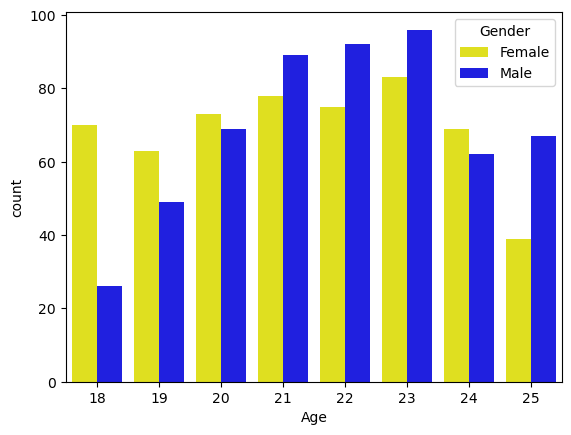

In [11]:
custom_palette = {'Male': 'Blue', 'Female': 'Yellow'}
sns.countplot(x="Age",hue="Gender",data=df, palette=custom_palette)

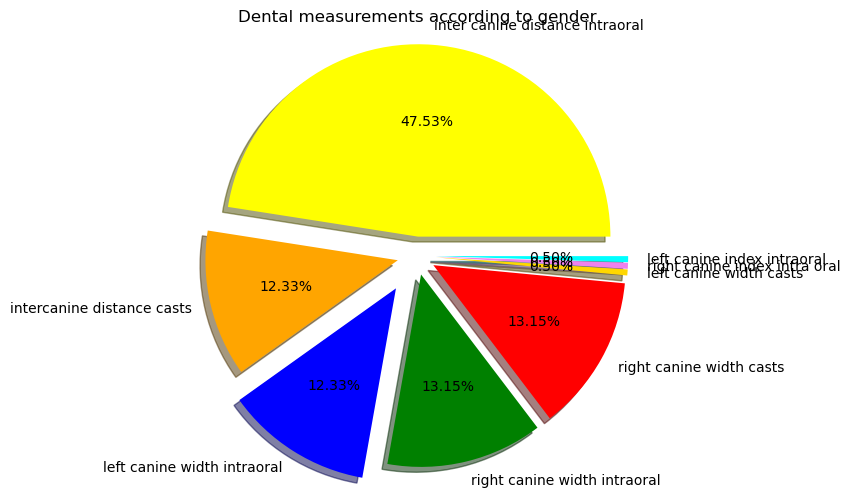

In [12]:
labels = ['inter canine distance intraoral',
          'intercanine distance casts',
          'left canine width intraoral',
          'right canine width intraoral',
          'right canine width casts',
          'left canine width casts',
          'right canine index intra oral',
          'left canine index intraoral']
sizes = [df.iloc[-1,3], df.iloc[-1,4], df.iloc[-1,5] ,
         df.iloc[-1,6], df.iloc[-1,7] , df.iloc[-1,8],
         df.iloc[-1,9], df.iloc[-1,9]]  # Changed the last index to 9 to match the labels
colors = ['yellow', 'orange', 'blue' , 'green', 'red', 'gold', 'violet', 'cyan']
explode = (0.1, 0.1, 0.2, 0.1, 0.1, 0.1, 0.1 , 0.1)

plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Dental measurements according to gender')
plt.show()

In [13]:
import plotly.express as px
custom_colors = ['Blue', 'Yellow'] 
fig = px.histogram(
    df, 
    x="Gender", 
    color="Gender",  # Use 'Gender' to apply colors
    category_orders={"Gender": df["Gender"].unique()},  # Order of categories
    color_discrete_sequence=custom_colors  # Custom color sequence
)
fig.update_layout(
    title='Count Plot of Gender',  # Add title
    xaxis_title='Gender',  # Add x-axis label
    yaxis_title='Count',  # Add y-axis label
    template='plotly_white'  # Set a template for a cleaner look
)

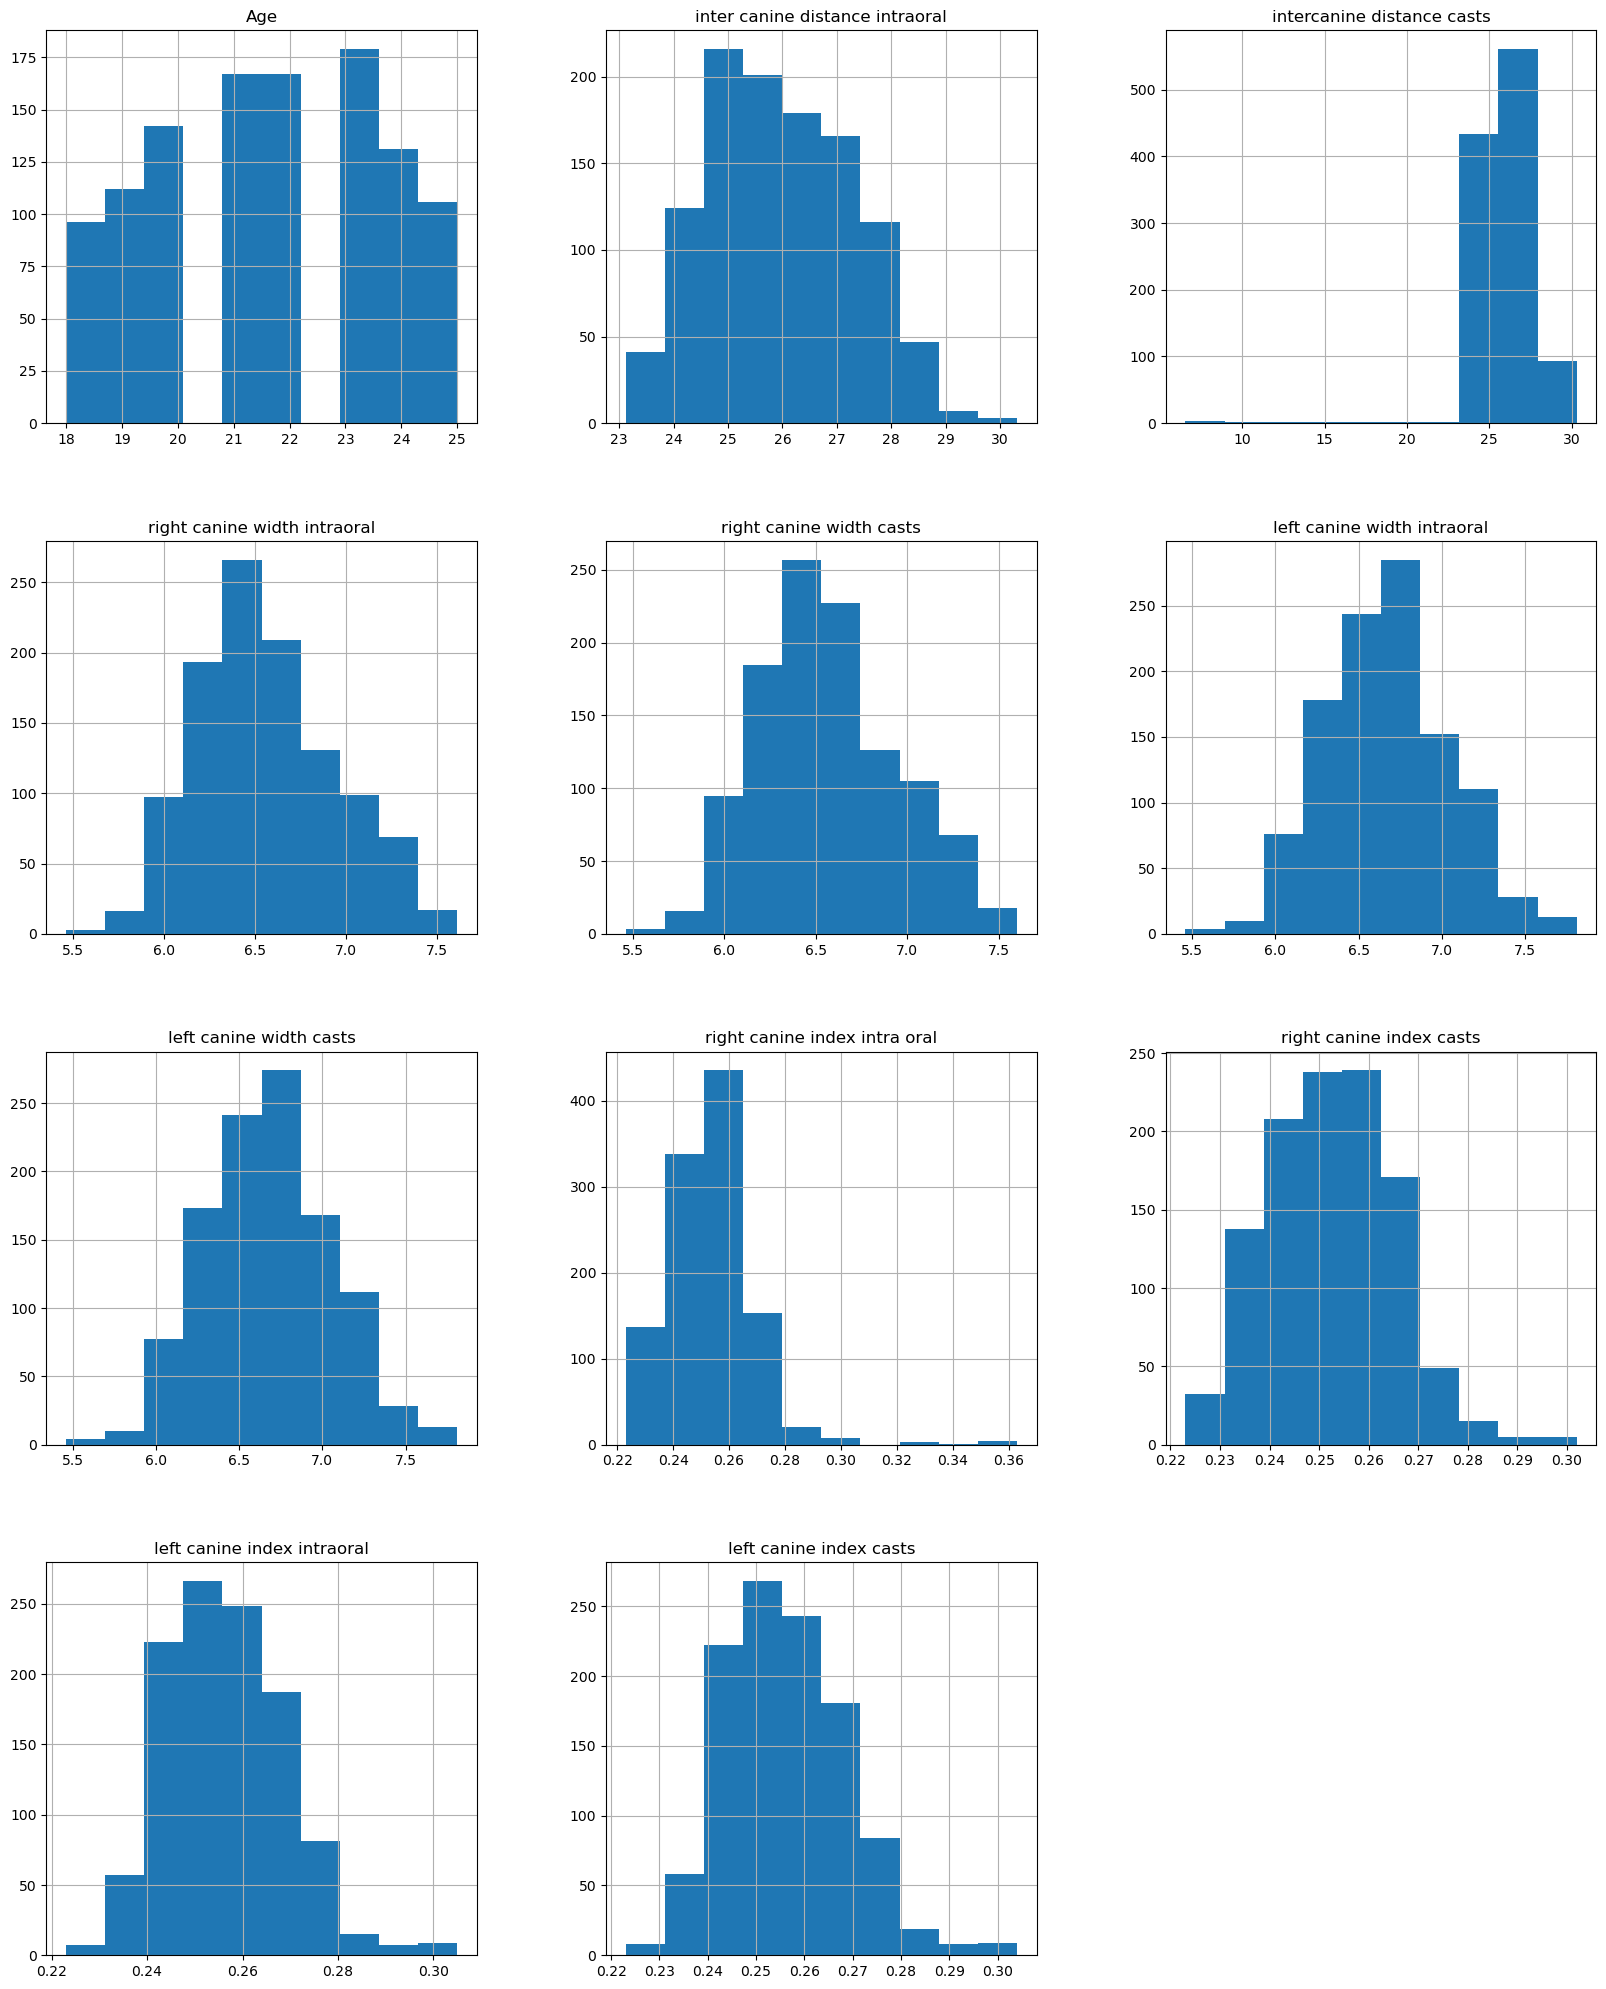

In [14]:
df.hist(figsize=(20,25))
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

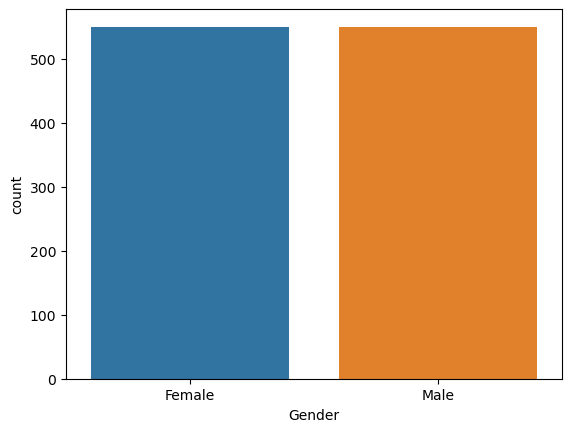

In [15]:
sns.countplot(x="Gender",data=df)

<Axes: xlabel='Age', ylabel='Gender'>

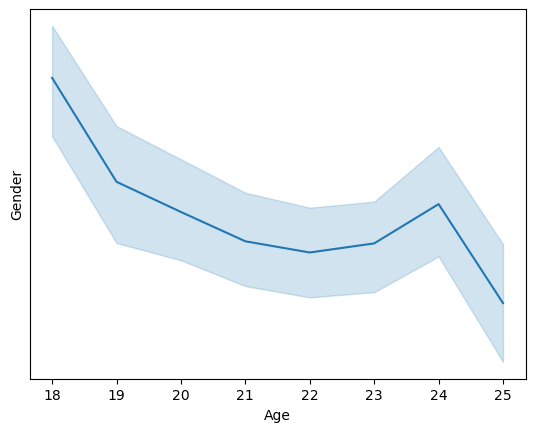

In [16]:
sns.lineplot(x="Age",y="Gender",data=df)

<Axes: xlabel='Gender', ylabel='Age'>

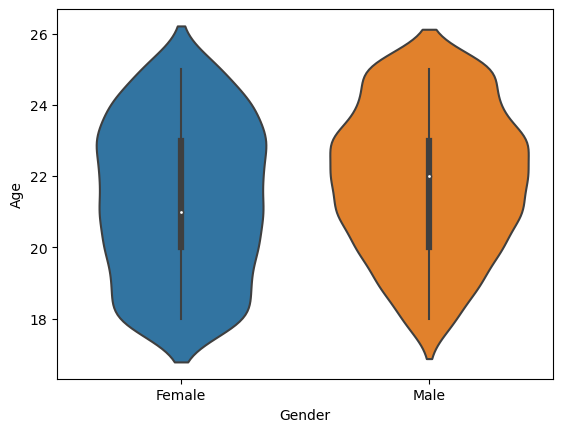

In [17]:
sns.violinplot(x="Gender",y="Age",data=df)

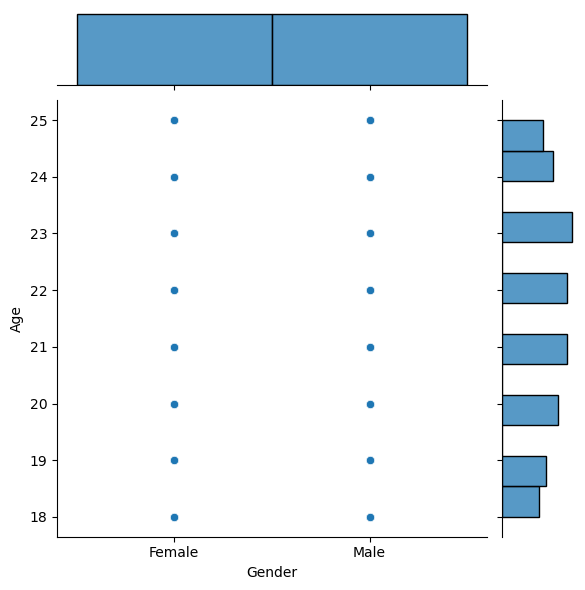

In [18]:
sns.jointplot(x="Gender",y="Age",data=df)

In [19]:
corr_matrix=df.corr(numeric_only=True)
corr_matrix

Age  inter canine distance intraoral  \
Age                              1.000000                         0.071300   
inter canine distance intraoral  0.071300                         1.000000   
intercanine distance casts       0.033494                         0.755648   
right canine width intraoral     0.243534                         0.564793   
right canine width casts         0.241017                         0.566652   
left canine width intraoral      0.162094                         0.601423   
left canine width casts          0.167698                         0.590075   
right canine index intra oral    0.101415                        -0.382836   
right canine index casts         0.199058                        -0.352744   
left canine index intraoral      0.112364                        -0.343861   
left canine index casts          0.109734                        -0.338299   

                                 intercanine distance casts  \
Age                                                0.033494   
inter canine distance intraoral                    0.755648   
intercanine distance casts                         1.000000   
right canine width intraoral                       0.400577   
right canine width casts                           0.402120   
left canine width intraoral                        0.435529   
left canine width casts                            0.357952   
right canine index intra oral                     -0.308260   
right canine index casts                          -0.297661   
left canine index intraoral                       -0.283392   
left canine index casts                           -0.279846   

                                 right canine width intraoral  \
Age                                                  0.243534   
inter canine distance intraoral                      0.564793   
intercanine distance casts                           0.400577   
right canine width intraoral                         1.000000   
right canine width casts                             0.999832   
left canine width intraoral                          0.941932   
left canine width casts                              0.937016   
right canine index intra oral                        0.434863   
right canine index casts                             0.570471   
left canine index intraoral                          0.506583   
left canine index casts                              0.510783   

                                 right canine width casts  \
Age                                              0.241017   
inter canine distance intraoral                  0.566652   
intercanine distance casts                       0.402120   
right canine width intraoral                     0.999832   
right canine width casts                         1.000000   
left canine width intraoral                      0.943088   
left canine width casts                          0.938069   
right canine index intra oral                    0.432951   
right canine index casts                         0.568764   
left canine index intraoral                      0.506022   
left canine index casts                          0.510247   

                                 left canine width intraoral  \
Age                                                 0.162094   
inter canine distance intraoral                     0.601423   
intercanine distance casts                          0.435529   
right canine width intraoral                        0.941932   
right canine width casts                            0.943088   
left canine width intraoral                         1.000000   
left canine width casts                             0.994120   
right canine index intra oral                       0.341201   
right canine index casts                            0.473677   
left canine index intraoral                         0.540797   
left canine index casts                             0.545525   

                                 left canine width casts  \
A

<Axes: >

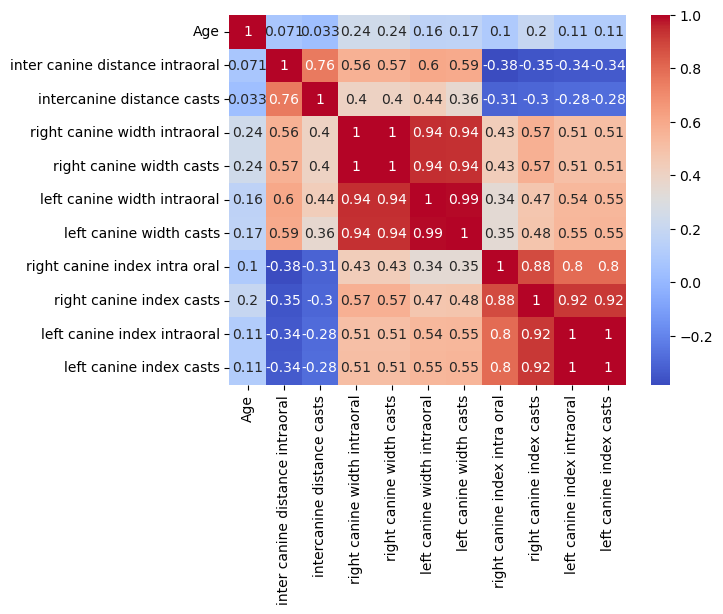

In [20]:
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")

### To check outliers in this, we have to show it from Boxplot :

<Axes: xlabel='Age'>

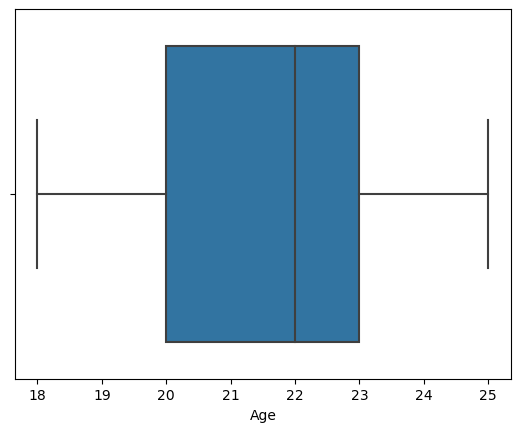

In [21]:
sns.boxplot(x="Age",hue="Gender",data=df)

<Axes: xlabel='inter canine distance intraoral'>

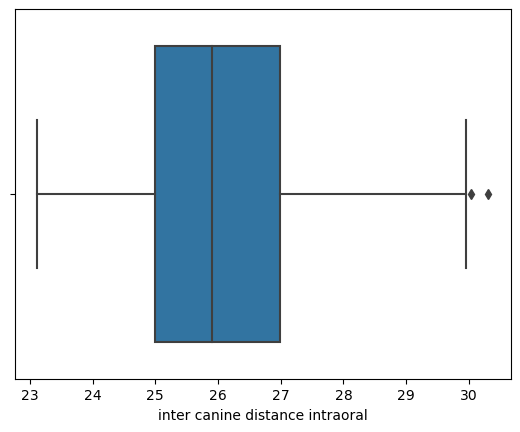

In [22]:
sns.boxplot(x="inter canine distance intraoral",hue="Gender",data=df)

<Axes: xlabel='intercanine distance casts'>

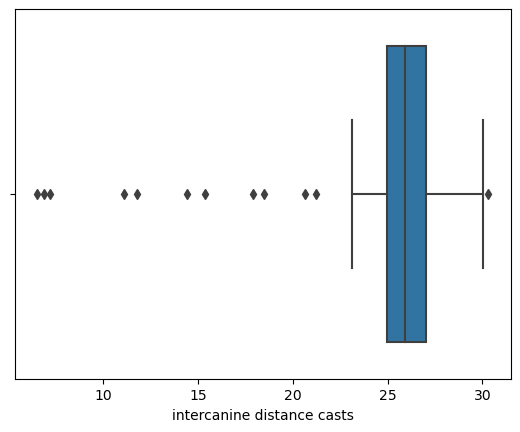

In [23]:
sns.boxplot(x="intercanine distance casts",hue="Gender",data=df)  

<Axes: xlabel='right canine width intraoral'>

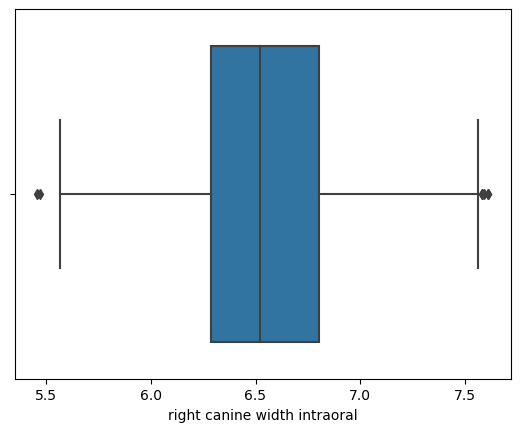

In [24]:
sns.boxplot(x="right canine width intraoral",hue="Gender",data=df)  

<Axes: xlabel='left canine width intraoral'>

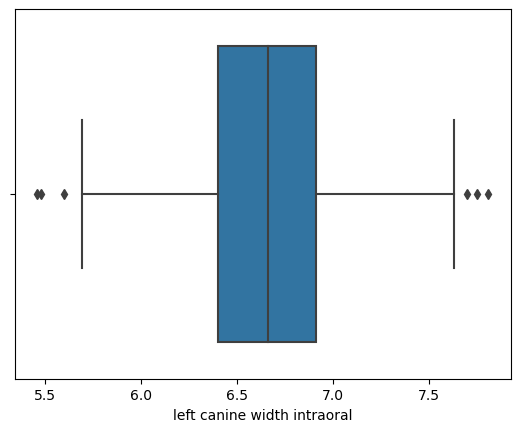

In [25]:
sns.boxplot(x="left canine width intraoral",hue="Gender",data=df)  

<Axes: xlabel='right canine width casts'>

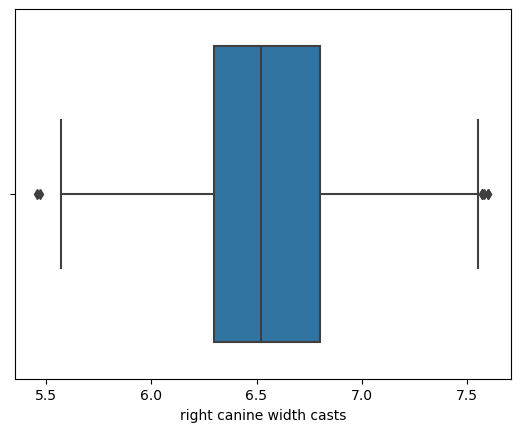

In [26]:
sns.boxplot(x="right canine width casts",hue="Gender",data=df)  

<Axes: xlabel='left canine width casts'>

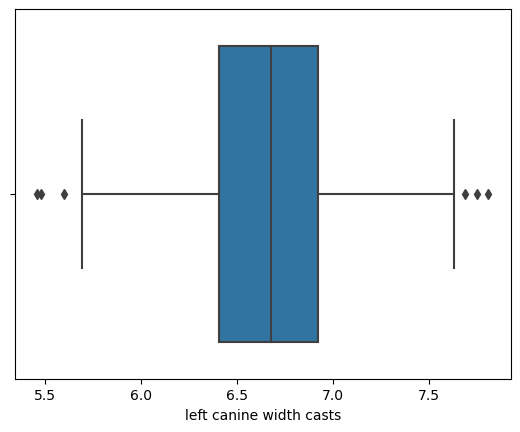

In [27]:
sns.boxplot(x="left canine width casts",hue="Gender",data=df)  

<Axes: xlabel='right canine index intra oral'>

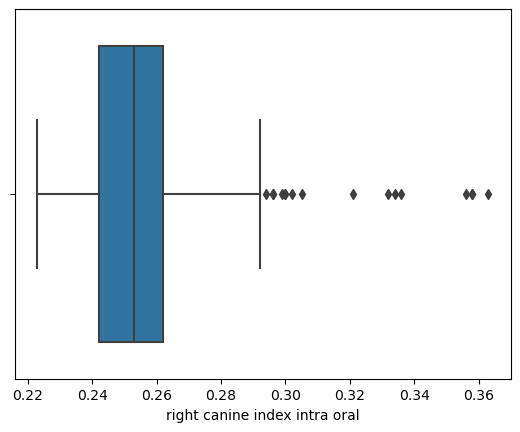

In [28]:
sns.boxplot(x="right canine index intra oral",hue="Gender",data=df)  

<Axes: xlabel='left canine index intraoral'>

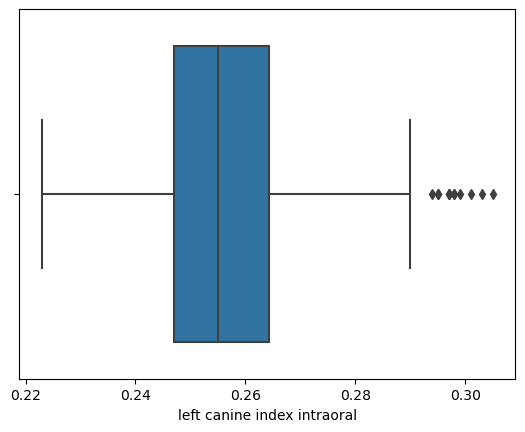

In [29]:
sns.boxplot(x="left canine index intraoral",hue="Gender",data=df)

<Axes: xlabel='right canine index casts'>

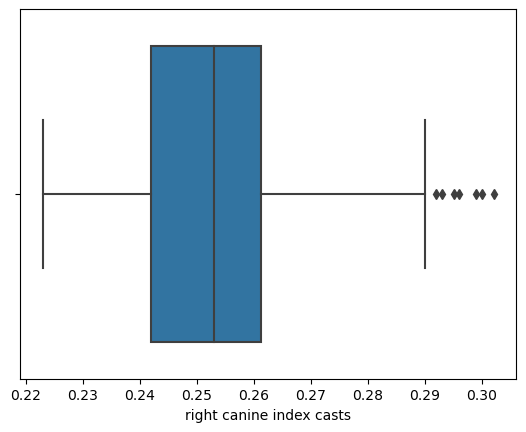

In [30]:
sns.boxplot(x="right canine index casts",hue="Gender",data=df)

### As we can see here, outliers are on all measurement columns, to remove this outliers we have calculate z-score, IQR or Tukey's method (Median Absolute Deviation (MAD) method).

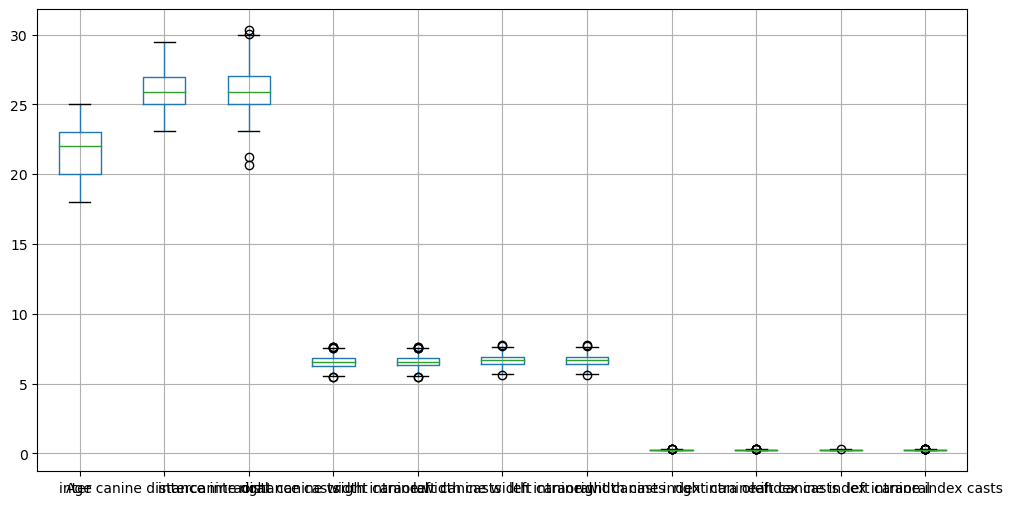

In [31]:
for col in ['inter canine distance intraoral',
          'intercanine distance casts',
          'left canine width intraoral',
          'right canine width intraoral',
          'right canine width casts',
          'left canine width casts',
          'right canine index intra oral',
          'left canine index intraoral']:
    z = (df[col] - df[col].mean()) / df[col].std()
    outlier_mask = np.abs(z) > 3
    df.loc[outlier_mask, col] = df[col].median()
# Create a boxplot to visualize the data
df.boxplot(figsize=(12, 6))
plt.show()

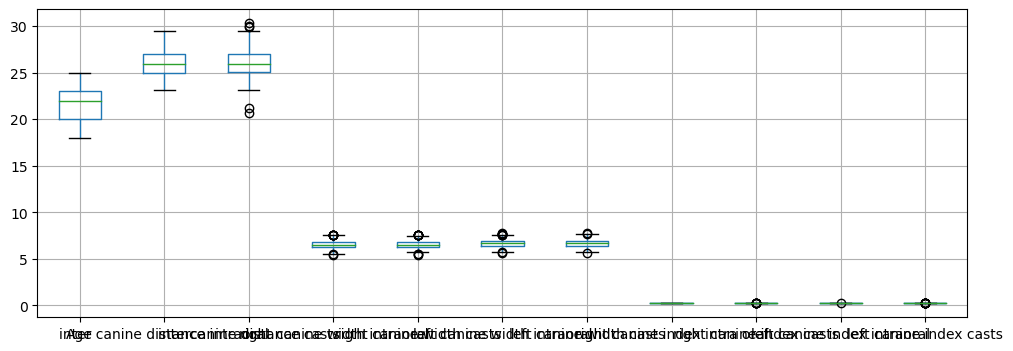

In [32]:
for col in ['inter canine distance intraoral',
          'intercanine distance casts',
          'left canine width intraoral',
          'right canine width intraoral',
          'right canine width casts',
          'left canine width casts',
          'right canine index intra oral',
          'left canine index intraoral']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    outliers_mask = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
    df.loc[outlier_mask,col] = df[col].median()
    
df.boxplot(figsize=(12,4))
plt.show()

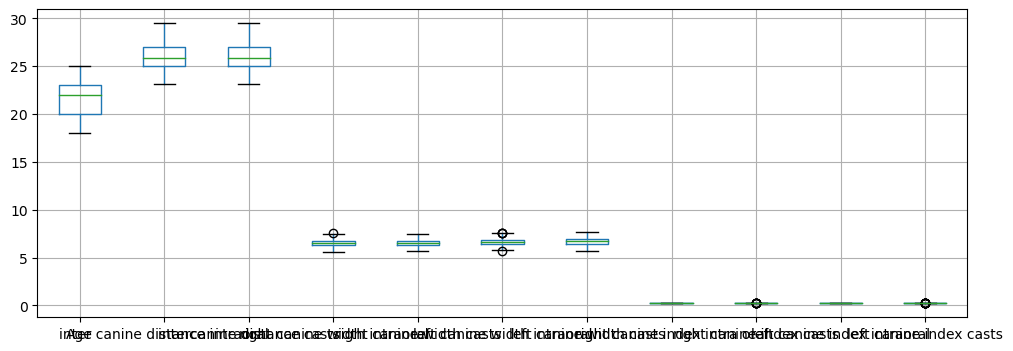

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

for col in [
    'inter canine distance intraoral',
    'intercanine distance casts',
    'left canine width intraoral',
    'right canine width intraoral',
    'right canine width casts',
    'left canine width casts',
    'right canine index intra oral',
    'left canine index intraoral'
]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Mask for outliers
    outliers_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    
    # Replace outliers with the median
    df.loc[outliers_mask, col] = df[col].median()

# Plot boxplot
df.boxplot(figsize=(12, 4))
plt.show()


Processing column: inter canine distance intraoral
Q1: 25.02, Q3: 26.9825, IQR: 1.9625000000000021
Lower Bound: 22.076249999999995, Upper Bound: 29.926250000000003
Number of outliers in inter canine distance intraoral: 0
Number of outliers in inter canine distance intraoral after replacement: 0
----------------------------------------
Processing column: intercanine distance casts
Q1: 25.04, Q3: 26.9825, IQR: 1.9425000000000026
Lower Bound: 22.126249999999995, Upper Bound: 29.896250000000006
Number of outliers in intercanine distance casts: 0
Number of outliers in intercanine distance casts after replacement: 0
----------------------------------------
Processing column: left canine width intraoral
Q1: 6.41, Q3: 6.87, IQR: 0.45999999999999996
Lower Bound: 5.720000000000001, Upper Bound: 7.5600000000000005
Number of outliers in left canine width intraoral: 0
Number of outliers in left canine width intraoral after replacement: 0
----------------------------------------
Processing column: r

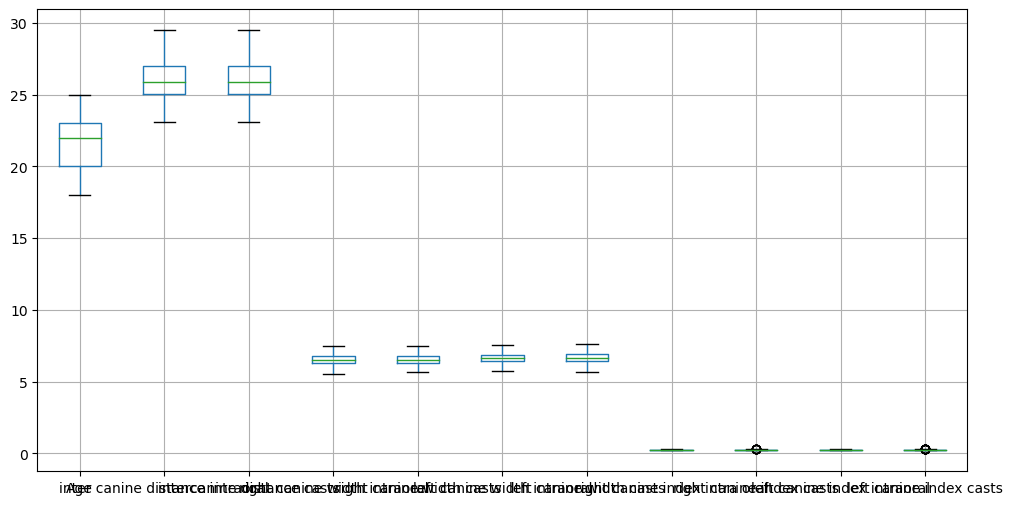

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is already loaded and contains the specified columns

for col in [
    'inter canine distance intraoral',
    'intercanine distance casts',
    'left canine width intraoral',
    'right canine width intraoral',
    'right canine width casts',
    'left canine width casts',
    'right canine index intra oral',
    'left canine index intraoral'
]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Debug prints
    print(f"Processing column: {col}")
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    # Mask for outliers
    outliers_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    
    # Debug print to see the number of outliers
    print(f"Number of outliers in {col}: {outliers_mask.sum()}")

    # Check if median is NaN
    median_value = df[col].median()
    if np.isnan(median_value):
        print(f"Median value for {col} is NaN")
    else:
        # Replace outliers with the median
        df.loc[outliers_mask, col] = median_value

    # Debug print to confirm replacement
    print(f"Number of outliers in {col} after replacement: {((df[col] < lower_bound) | (df[col] > upper_bound)).sum()}")
    print("-" * 40)

# Plot boxplot
df.boxplot(figsize=(12, 6))
plt.show()


C:\Users\Vedant\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



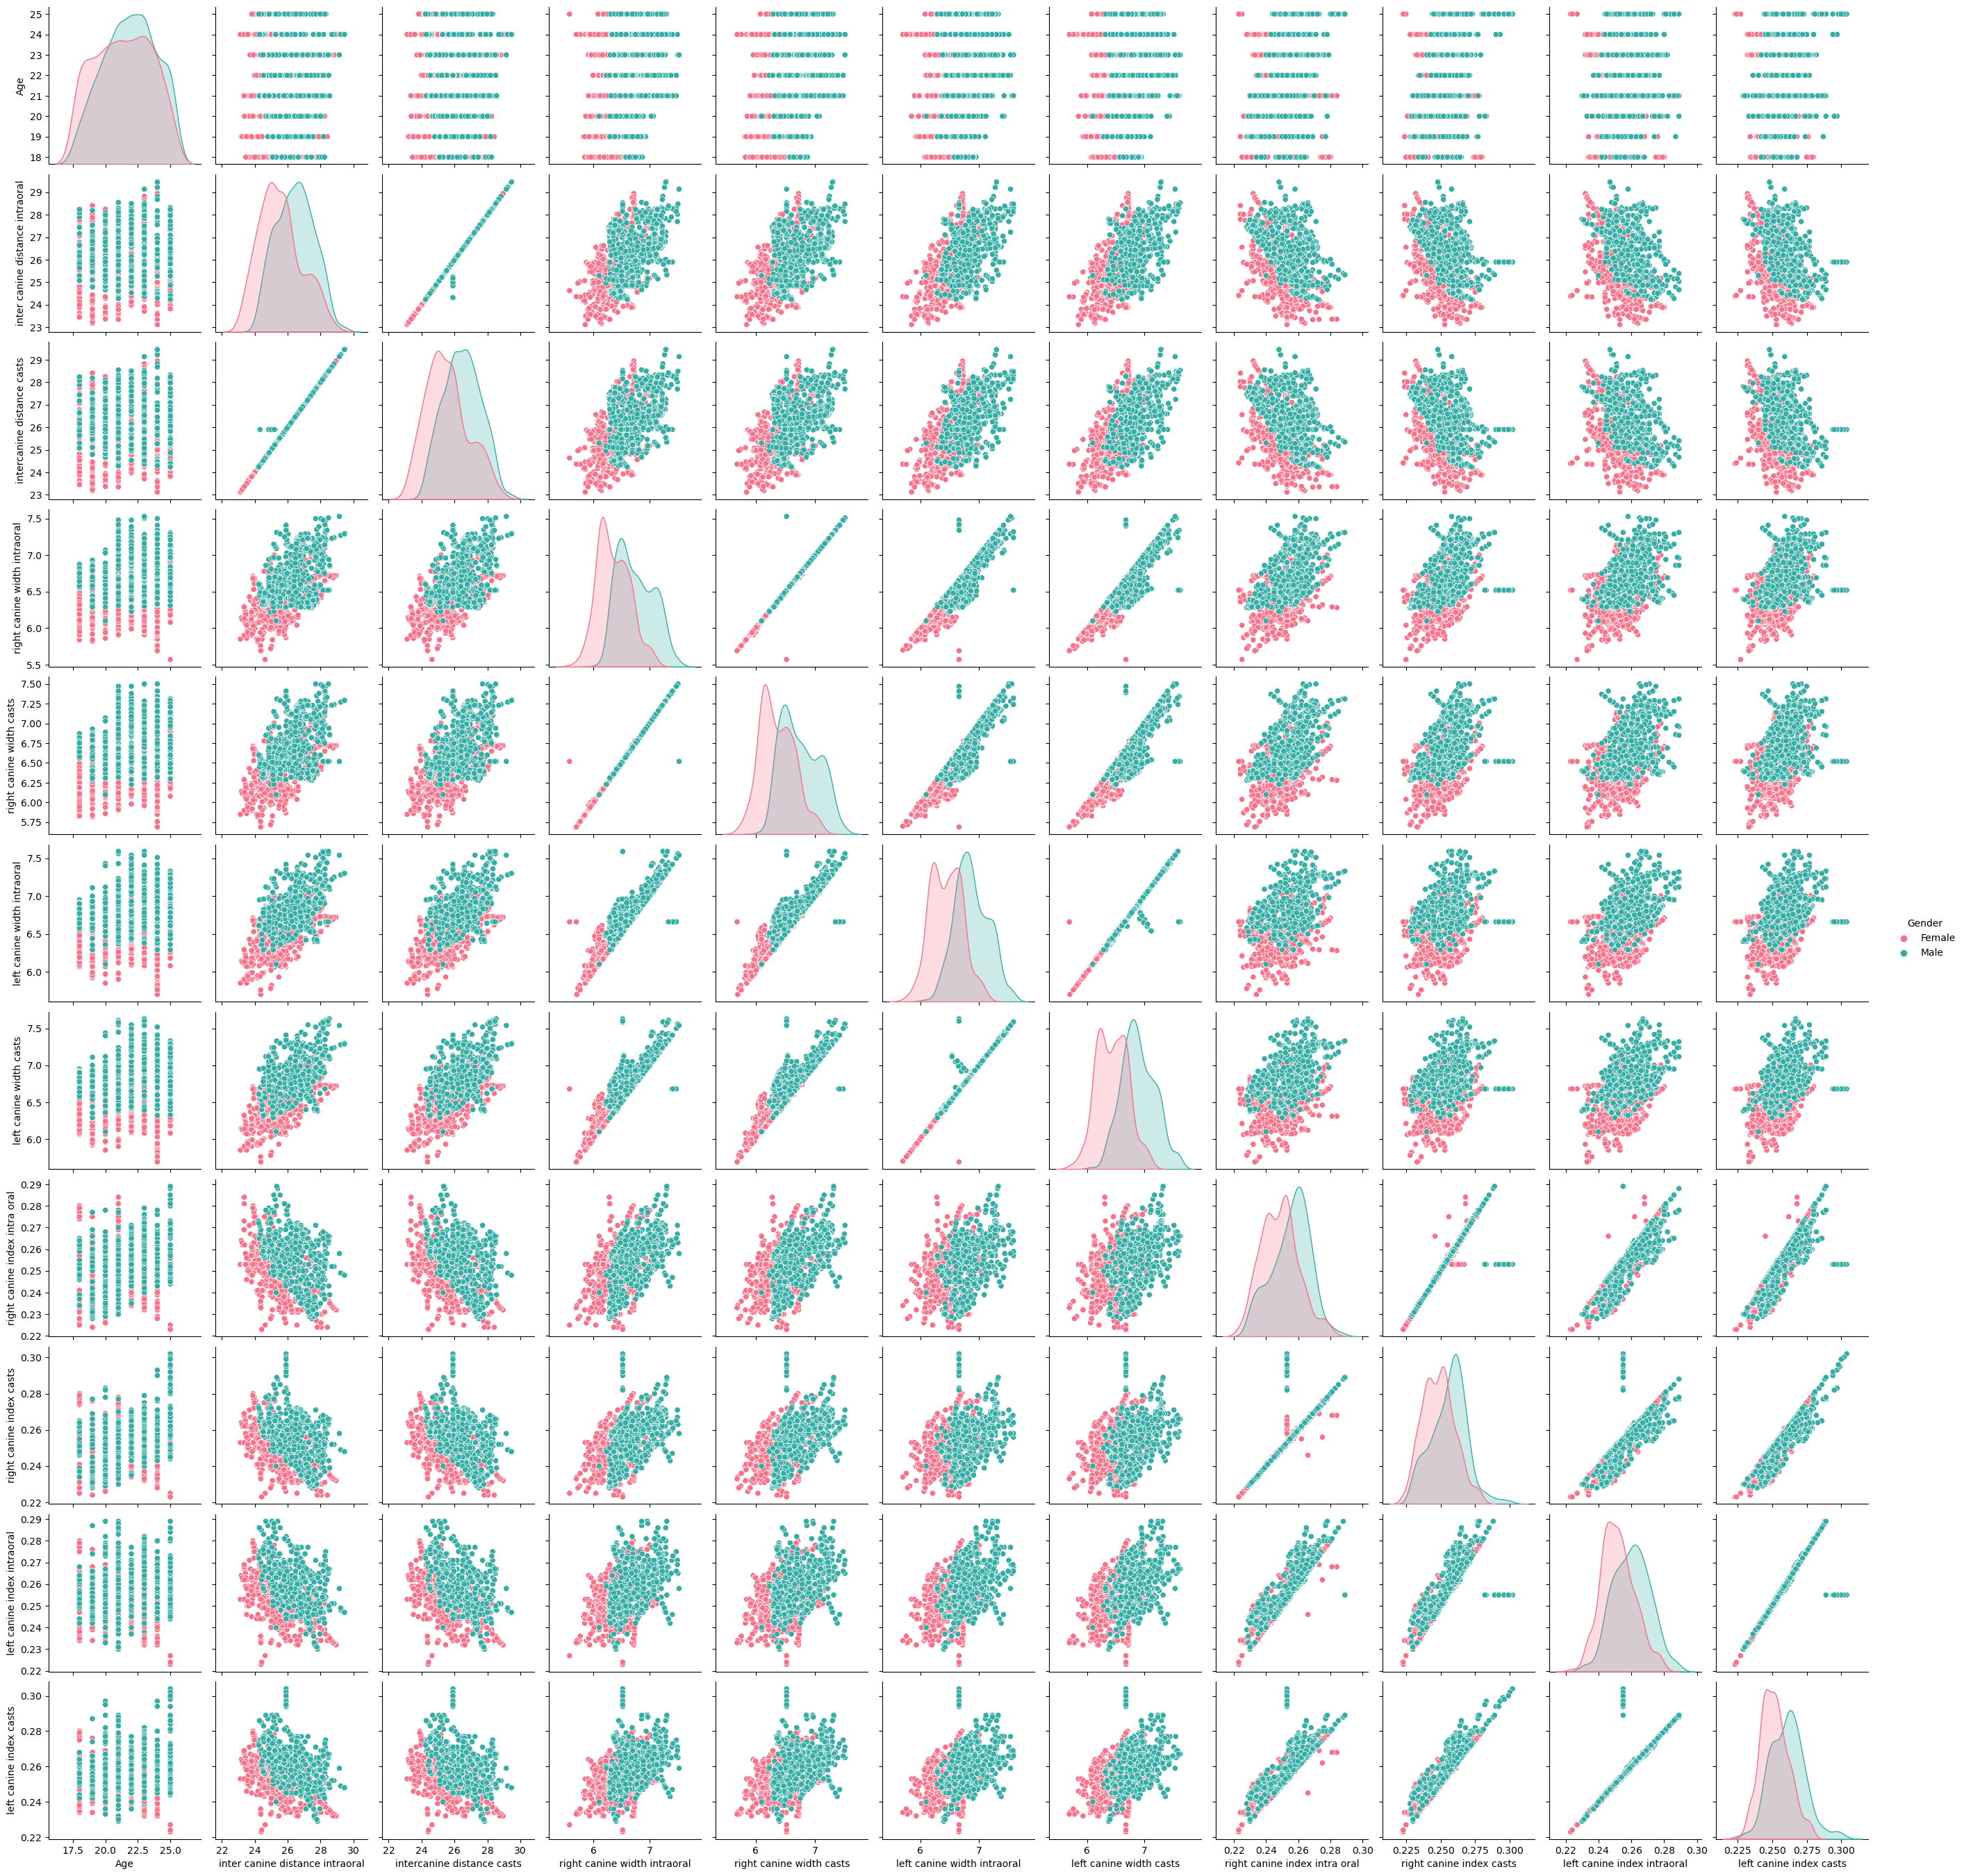

In [34]:
sns.pairplot(data=df, hue="Gender", diag_kind="kde", palette="husl")

## Linear Regression

In [35]:
x = df.drop(['Gender'],axis=1)
y = df['Gender'].values

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [37]:
from sklearn.linear_model import LogisticRegression
log_model =LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [38]:
log_model.score(x_train,y_train)

0.7863636363636364

In [39]:
log_model.score(x_test,y_test)

0.7681818181818182

## K-Nearest Neighbors (KNN)

In [40]:
model_knn=KNeighborsClassifier(n_neighbors=8,weights='uniform',leaf_size=30,p=2,algorithm='ball_tree')    #shift+tab-see the data

In [41]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=8)

In [42]:
model_knn.fit(x_test,y_test)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=8)

In [43]:
model_knn.score(x_test,y_test)

0.8227272727272728

## Random Forest Classifier

In [44]:
model = RandomForestClassifier(random_state=42)

model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
y_pred = model.predict(x_test)

In [46]:
train_score = model.score(x_train,y_train)
print(train_score)

1.0


In [47]:
train_score = model.score(x_test,y_test)
print(train_score)

0.9090909090909091


In [94]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and test sets
x_train, x_test, y_train_encoded, y_test_encoded = train_test_split(x, y_encoded, test_size=0.2, random_state=0)

In [97]:
model = RandomForestClassifier()

model.fit(x_train, y_trainencoded)

RandomForestClassifier()

In [98]:
# Calculate and print the accuracy on the test data
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Random Forest Accuracy: {accuracy * 100:.2f}%')

Random Forest Accuracy: 91.36%


## Support Vector Machines (SVMs)

In [48]:
from sklearn.svm import SVC

In [49]:
model_svc = SVC()

In [50]:
model_svc.fit(x_train,y_train)

SVC()

In [51]:
model_svc.score(x_train,y_train)

0.7181818181818181

In [52]:
model_svc.score(x_test,y_test)

0.6863636363636364

In [80]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [82]:
x_train, x_test, y_train_encoded, y_test_encoded = train_test_split(x, y_encoded, test_size=0.2, random_state=0)

In [84]:
model_svc = SVC()
model_svc.fit(x_train, y_train_encoded)

SVC()

In [85]:
accuracy = model_svc.score(x_train, y_train_encoded)
print(f'SVC Accuracy: {accuracy * 100:.2f}%')

SVC Accuracy: 71.82%


## Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
model_dt = DecisionTreeClassifier(max_depth=6,criterion='gini')

In [56]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [57]:
model_dt.score(x_train, y_train)

0.8829545454545454

In [58]:
model_dt.score(x_test, y_test)

0.8181818181818182

## AdaBoost (Adaptive Boosting)

In [59]:
from sklearn.ensemble import AdaBoostClassifier

In [60]:
model=AdaBoostClassifier(n_estimators=10)

In [61]:
model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=10)

In [62]:
model.score(x_train,y_train)

0.7965909090909091

In [63]:
model.score(x_test,y_test)

0.8090909090909091

## XGBoost (Extreme Gradient Boosting)

In [64]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [65]:
import xgboost as xgb
xg_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')


In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [67]:
#Use label_encoder whenever  target variable y_train contains categorical values ('Female' and 'Male') instead of numerical values (0 and 1)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [68]:
y_train = label_encoder.fit_transform(y_train)

In [69]:
xg_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

In [70]:
xg_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [71]:
y_pred = xg_classifier.predict(x_test)

In [87]:
# Encode the target variable if it's categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [89]:
# Split the data into training and test sets
x_train, x_test, y_train_encoded, y_test_encoded = train_test_split(x, y_encoded, test_size=0.2, random_state=0)

In [90]:
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_xgb.fit(x_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [91]:
# Make predictions on the test set
y_pred = model_xgb.predict(x_test)

In [92]:
# Calculate and print the accuracy on the test data
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'XGBoost Accuracy: {accuracy * 100:.2f}%')

XGBoost Accuracy: 91.36%


## Bagging

In [73]:
x_train, y_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=22)
estimator_range=[2,4,6,8,10,12,14,16,18,20]
models=[]
scores=[]

In [74]:
model.score(x_train,y_train)

0.7963636363636364

### we can see here, score is not around 1.0 except random forest classifier's score and accurancy so we can do Standardization and see score and score each of them

## Standardization

In [143]:
from sklearn.preprocessing import StandardScaler

In [144]:
columns_to_standardize = [col for col in df.columns if col != 'Gender']

scaler = StandardScaler()

# Fit and transform the data
df_standardized = df.copy()  
df_standardized[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

df_standardized[columns_to_standardize].head()

Age  inter canine distance intraoral  intercanine distance casts  \
0  1.138902                        -0.723357                   -0.743107   
1  0.179643                        -0.164502                   -0.166660   
2  0.659272                        -1.678067                   -1.693466   
3 -0.779616                         0.099401                    0.090404   
4 -0.779616                         0.285686                    0.316309   

   right canine width intraoral  right canine width casts  \
0                     -1.308596                 -1.324672   
1                     -1.169408                 -1.184498   
2                     -1.781836                 -1.661091   
3                     -1.308596                 -1.324672   
4                     -1.280758                 -1.296637   

   left canine width intraoral  left canine width casts  \
0                    -1.636791                -1.573615   
1                    -0.942199                -0.936636   
2                    -1.086905                -1.075110   
3                    -0.276548                -0.299657   
4                    -0.450196                -0.465825   

   right canine index intra oral  right canine index casts  \
0                      -0.811802                 -0.803515   
1                      -1.220041                 -1.191516   
2                      -0.321915                 -0.337914   
3                      -1.628280                 -1.579518   
4                      -1.709928                 -1.657118   

   left canine index intraoral  left canine index casts  
0                    -1.213665                -1.241960  
1                    -0.778631                -0.756848  
2                     0.700483                 0.617636  
3                    -0.517611                -0.514292  
4                    -0.865638                -0.837700

## Z-score 

In [126]:
from scipy.stats import zscore

In [127]:
zscore=x.apply(zscore)

In [128]:
x_train,x_test,y_train,y_test = train_test_split(zscore,y,test_size=0.5)

In [129]:
x_train_scaled = scaler.fit_transform(x_train)

In [130]:
x_test_scaled = scaler.transform(x_test)

In [160]:
abel_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize the features using z-scores
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split the data into training and test sets
x_train, x_test, y_train_encoded, y_test_encoded = train_test_split(x_scaled, y_encoded, test_size=0.2, random_state=0)

# Initialize and train the SVC model
model_svc = SVC()
model_svc.fit(x_train, y_train_encoded)

# Calculate and print the accuracy on the training data
accuracy_train = model_svc.score(x_train, y_train_encoded)
print(f'SVC Training Accuracy: {accuracy_train * 100:.2f}%')

SVC Training Accuracy: 84.20%


In [161]:
# Calculate and print the accuracy on the test data
accuracy_test = model_svc.score(x_test, y_test_encoded)
print(f'SVC Test Accuracy: {accuracy_test * 100:.2f}%')

SVC Test Accuracy: 82.27%


## Logistic Regression after Standerization

In [131]:
lm = LogisticRegression()

In [132]:
lm.fit(x_train, y_train)

LogisticRegression()

In [140]:
lm.score(x_test,y_test)

LogisticRegression: 76.82%


In [164]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize the features using z-scores
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split the data into training and test sets
x_train, x_test, y_train_encoded, y_test_encoded = train_test_split(x_scaled, y_encoded, test_size=0.2, random_state=0)

# Initialize and train the Logistic Regression model
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train_encoded)

# Calculate and print the accuracy on the training data
accuracy_train = model_lr.score(x_train, y_train_encoded)
print(f'Logistic Regression Training Accuracy: {accuracy_train * 100:.2f}%')

Logistic Regression Training Accuracy: 82.27%


In [165]:
# Calculate and print the accuracy on the test data
accuracy_test = model_lr.score(x_test, y_test_encoded)
print(f'Logistic Regression Test Accuracy: {accuracy_test * 100:.2f}%')

Logistic Regression Test Accuracy: 80.00%


## SVC after Standerization

In [145]:
model_svc = SVC()

In [154]:
# Encode the target variable if it's categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and test sets
x_train, x_test, y_train_encoded, y_test_encoded = train_test_split(x, y_encoded, test_size=0.2, random_state=0)

# Initialize and train the SVC model
model_svc = SVC()
model_svc.fit(x_train, y_train_encoded)

# Calculate and print the accuracy on the training data
accuracy_train = model_svc.score(x_train, y_train_encoded)
print(f'SVC Training Accuracy: {accuracy_train * 100:.2f}%')


SVC Training Accuracy: 71.82%


In [156]:
## Calculate and print the accuracy on the test data
accuracy_test = model_svc.score(x_test, y_test_encoded)
print(f'SVC Test Accuracy: {accuracy_test * 100:.2f}%')

SVC Test Accuracy: 68.64%


## As per score of above models, After Stadardization models couldn't give good score, only Random Forest modal gives maximum score i.e. 1.0 and accuracy is approx 91 % as we seen earlier, so the best model is Random Forest Classifier